# Rydberg Linescan

### Configure IPython

In [7]:
# import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# custom packages
import sspals, oskar

### Import Data

In [2]:
RIDS = ['20160408_205532']
h5 = oskar.H5Data(RIDS[0])              # data
out_dire = h5.out_dire("Analysis")      # output

In [3]:
DF = oskar.average_data(RIDS, verbose=True, loop=True, exclude=['avL_SSPALS.dat'])
DF.head()

Loaded: sspals_CH_L2[ -1.00e-08   1.10e-07   5.00e-07].dat
Loaded: av_SSPALS.dat


DLY_EA      IR  VOL_u100  VOL_u101  t0_ra_reps  \
RID             VID                                                     
20160408_205532 1    0.000063  747.00      3000      2000       200.0   
                2    0.000063  747.03      3000      2000       200.0   
                3    0.000063  747.06      3000      2000       200.0   
                4    0.000063  747.09      3000      2000       200.0   
                5    0.000063  747.12      3000      2000       200.0   

                       t0_ra_mean     t0_ra_std     t0_ra_sem  DF_ra_reps  \
RID             VID                                                         
20160408_205532 1    2.791743e-07  3.376632e-10  2.387640e-11       200.0   
                2    2.790767e-07  4.250918e-10  3.005853e-11       200.0   
                3    2.791623e-07  3.440526e-10  2.432819e-11       200.0   
                4    2.791308e-07  3.528922e-10  2.495325e-11       200.0   
                5    2.790929e-07  3.743667e-10  2.647172e-11       200.0   

                     DF_ra_mean      ...         DF_std    DF_sem  Range_reps  \
RID             VID                  ...                                        
20160408_205532 1      0.174051      ...       0.007311  0.000366         399   
                2      0.175223      ...       0.007267  0.000363         400   
                3      0.173670      ...       0.007026  0.000351         400   
                4      0.174119      ...       0.007272  0.000364         400   
                5      0.174177      ...       0.007051  0.000353         400   

                     Range_mean  Range_std  Range_sem  FWHM_reps  \
RID             VID                                                
20160408_205532 1      0.282372   0.015287   0.000765        399   
                2      0.281807   0.017130   0.000856        400   
                3      0.281290   0.016005   0.000800        400   
                4      0.280511   0.015276   0.000764        400   
                5      0.283904   0.014312   0.000716        400   

                        FWHM_mean      FWHM_std      FWHM_sem  
RID             VID                                            
20160408_205532 1    1.135488e-08  6.469887e-10  3.238995e-11  
                2    1.136783e-08  6.446689e-10  3.223344e-11  
                3    1.129170e-08  6.398366e-10  3.199183e-11  
                4    1.136149e-08  6.277432e-10  3.138716e-11  
                5    1.127296e-08  6.198814e-10  3.099407e-11  

[5 rows x 28 columns]

## Plot Data

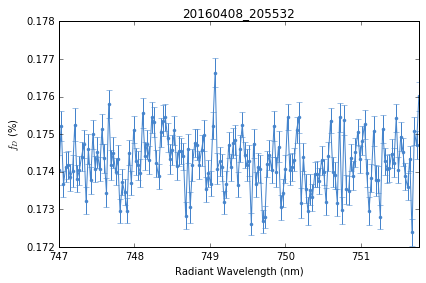

In [4]:
X = 'IR'
Y = 'DF_ra'
#plot setup
fig, ax = plt.subplots()
j = 0
for rid in RIDS:
    sg = DF.loc[rid].sort_values(by=X)
    x = sg[X].values
    y = sg[Y+'_mean'].values
    yerr = sg[Y+'_sem'].values
    ax.errorbar(x, y, yerr=yerr, fmt ='.-', color=oskar.colors[j%7])
    j = j  + 1

#format
ax.set_ylabel("$f_{D}$ (%)")
ax.set_xlabel("Radiant Wavelength (nm)")
ax.set_xlim(x.min(), x.max())
ax.set_title(rid)
plt.tight_layout()

#save data
fileout = os.path.join(out_dire, "DF_linescan2.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()

## Signal

In [5]:
#calculate signal
X = 'IR'
Y = 'DF_ra'
for rid in RIDS:
    dat = DF.loc[rid]
    back = dat[(dat[X] > 751) | (dat[X] < 748)][Y+'_mean'] #define background
    bk = back.mean()
    bk_sem = back.std()/np.sqrt(back.count())
    sig = sspals.signal(dat[Y+'_mean'], dat[Y+'_sem'], bk, bk_sem)
    DF.loc[rid, 'S'] = sig[0].values
    DF.loc[rid, 'S_err'] = sig[1].values

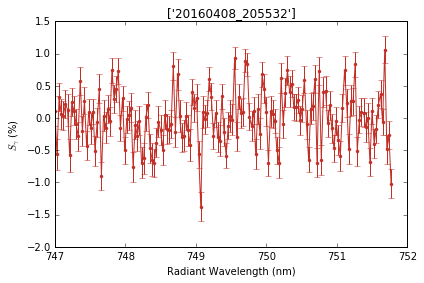

In [6]:
X = 'IR'
Y2 = 'S'
#plot setup
fig, ax = plt.subplots(figsize=(6, 4))

#plot
j = 0
for rid in RIDS:
    sg = DF.loc[rid].sort_values(by=X)
    x = sg[X].values
    y = sg[Y2].values
    yerr = sg[Y2+'_err'].values
    eb = ax.errorbar(x, y, yerr=yerr, fmt ='.-', color=oskar.colors[(j + 2)%7])
    j = j + 1

#labels
ax.set_ylabel("$S_\gamma$ (%)")
ax.set_xlabel("Radiant Wavelength (nm)")
ax.set_title(RIDS)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "S_linescan.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()